Started analysis on 18th Aug 2024


> Sahoo S, Singh D, Chakraborty P, Jolly MK. Emergent Properties of the HNF4α-PPARγ Network May Drive Consequent Phenotypic Plasticity in NAFLD. Journal of Clinical Medicine. 2020; 9(3):870.

https://doi.org/10.3390/jcm9030870


# **RACIPE analysis - 18/8/2024**

**Figure 2 and 3**

In [ ]:
import pandas as pd

# Read a tab-separated .dat file
df = pd.read_csv('sarthak_2020_solution.dat', delimiter='\t', header=None,
names=[' Model_index', 'Number_of_stable_states',
'Runs_converged_to_steady_state', 'HNF1A', 'HNF4A', 'SREBP-1C', 'PPARG'])

# Display the first few rows of the dfFrame
print(df[['HNF1A', 'HNF4A', 'SREBP-1C', 'PPARG']])

#z-normalize the expression levels of genes using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['HNF1A', 'HNF4A', 'SREBP-1C', 'PPARG']] = scaler.fit_transform(df[['HNF1A', 'HNF4A', 'SREBP-1C', 'PPARG']])
print(df[['HNF1A', 'HNF4A', 'SREBP-1C', 'PPARG']])


          HNF1A      HNF4A  SREBP-1C     PPARG
0      6.002366   6.511007 -2.287849 -8.970900
1     -5.534062 -11.685324  4.818805 -2.183920
2     -5.533575  -6.327224 -2.256901 -6.369563
3     -5.534062 -11.845909  7.151351  4.035945
4     -3.833069  -6.826591  9.089193  4.270684
...         ...        ...       ...       ...
28731 -6.044175  -8.882125 -5.885773 -4.673928
28732  3.521022  -3.797738 -5.885773 -4.695431
28733  4.994581   3.239313 -5.885608 -7.186891
28734 -6.527405  -4.143140 -6.699223 -6.928265
28735 -6.527538  -9.919159  6.101956  4.627755

[28736 rows x 4 columns]
          HNF1A     HNF4A  SREBP-1C     PPARG
0      1.077848  1.207525 -0.451919 -1.138256
1     -1.068046 -1.551199  0.868161 -0.110165
2     -1.067955 -0.738864 -0.446171 -0.744206
3     -1.068046 -1.575545  1.301437  0.832020
4     -0.751644 -0.814572  1.661397  0.867578
...         ...       ...       ...       ...
28731 -1.162932 -1.126209 -1.120243 -0.487351
28732  0.616293 -0.355371 -1.120243 -0.490

In [ ]:
!pip install fastcluster

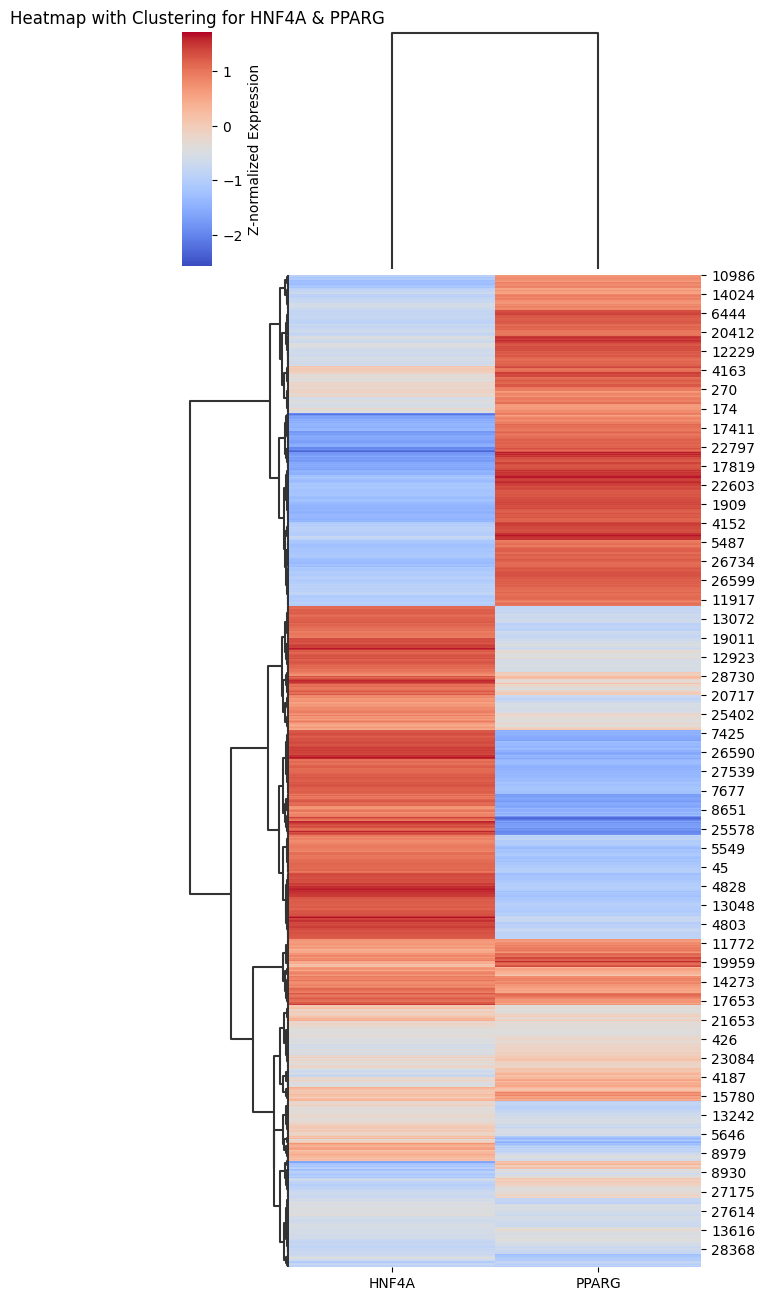

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import fastcluster

# Create the clustermap with hierarchical clustering
sns.clustermap(
    df[['HNF4A', 'PPARG']],
    method='ward',  # Linkage method, can be adjusted (e.g., 'average', 'single', 'complete')
    metric='euclidean',  # Distance metric
    cmap='coolwarm',
    standard_scale=None,
    figsize=(6, 13),
    cbar_kws={"label": "Z-normalized Expression"},
    dendrogram_ratio=(0.2, 0.2),
    tree_kws={"linewidths": 1.5},
    col_cluster=False,
    row_colors=None
)
plt.title('Heatmap with Clustering for HNF4A & PPARG')
# Show the plot
plt.show()


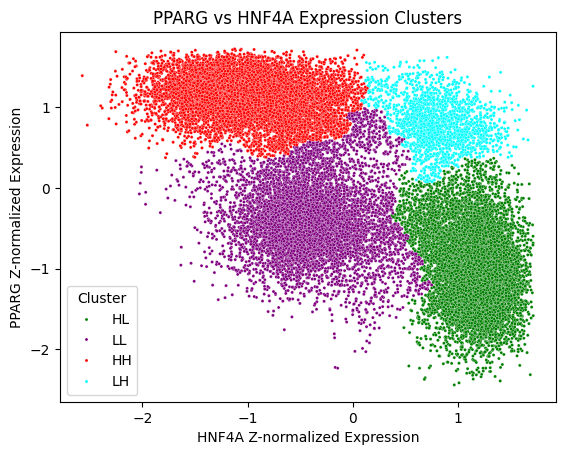

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster

# Perform hierarchical clustering using linkage
Z = linkage(df[['HNF4A', 'PPARG']], method='ward', metric='euclidean')

# Define number of clusters (4 clusters for HH, HL, LH, LL)
clusters = fcluster(Z, t=4, criterion='maxclust')

# Add cluster labels to the df
df['Cluster'] = clusters

# Map the clusters to the appropriate labels (HH, HL, LH, LL)
cluster_map = {
    1: 'HH',
    2: 'HL',
    3: 'LH',
    4: 'LL'
}
df['Cluster'] = df['Cluster'].map(cluster_map)

# Plotting the scatter plot with distinct clusters
sns.scatterplot(data=df, x='HNF4A', y='PPARG', hue='Cluster', palette={'HH': 'red', 'HL': 'green', 'LH': 'cyan', 'LL': 'purple'}, s = 5)

plt.title('PPARG vs HNF4A Expression Clusters')
plt.xlabel('HNF4A')
plt.ylabel('PPARG')
plt.legend(title='Cluster')

# Show the plot
plt.show()


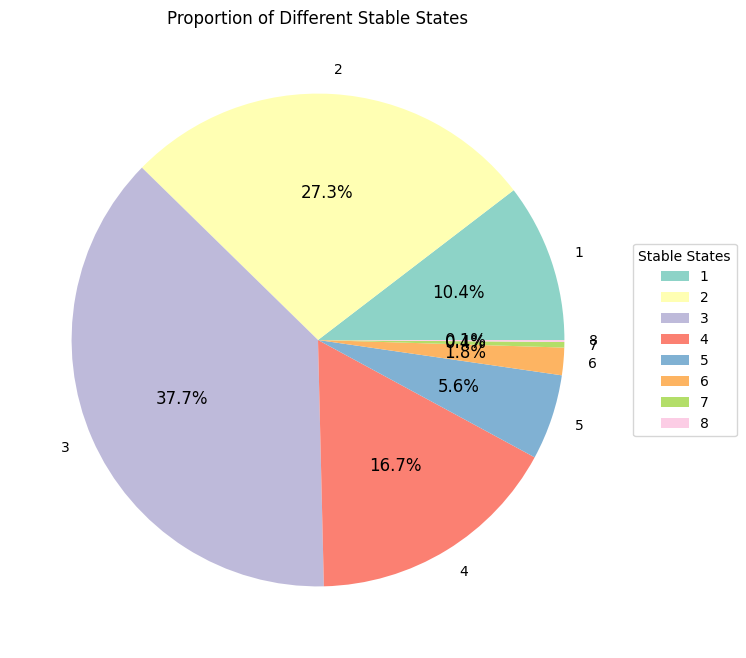

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the counts of each stable state
stable_states = df['Number_of_stable_states'].value_counts().sort_index()
stable_state_counts = stable_states/stable_states.index

# Calculate the relative proportions
stable_state_proportions = stable_state_counts / stable_state_counts.sum()

# Draw the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    stable_state_proportions,
    labels=stable_state_proportions.index,
    autopct='%1.1f%%',
    colors=sns.color_palette("Set3", len(stable_state_proportions))
)

plt.legend(
    wedges, stable_state_proportions.index,
    title="Stable States",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

for text in autotexts:
    text.set_color('black')
    text.set_fontsize(12)

plt.title('Proportion of Different Stable States')

plt.show()


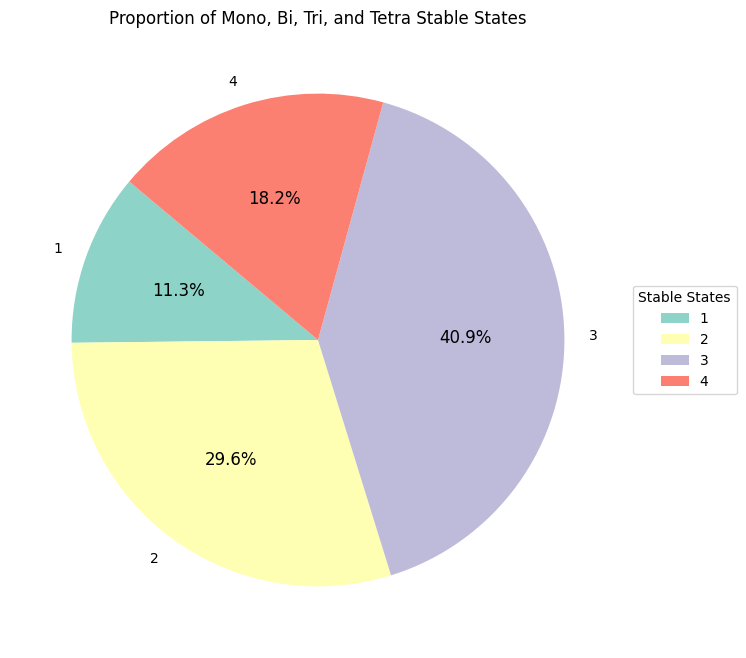

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to include only states 1, 2, 3, and 4
filtered_data = df[df['Number_of_stable_states'].isin([1, 2, 3, 4])]

# Calculate the counts of each stable state
stable_states = filtered_data['Number_of_stable_states'].value_counts().sort_index()
stable_state_counts = stable_states/stable_states.index
# Calculate the relative proportions
stable_state_proportions = stable_state_counts / stable_state_counts.sum()

# Draw the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    stable_state_proportions,
    labels=stable_state_proportions.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set3", len(stable_state_proportions))
)

plt.legend(
    wedges, stable_state_proportions.index,
    title="Stable States",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

for text in autotexts:
    text.set_color('black')
    text.set_fontsize(12)

plt.title('Proportion of Mono, Bi, Tri, and Tetra Stable States')

plt.show()


In [ ]:
def classify_expression(value):
    return 'H' if value > 0 else 'L'

# Apply classification to both B and D
df['State1'] = df['HNF4A'].apply(classify_expression)
df['State2'] = df['PPARG'].apply(classify_expression)

# Combine the states into a single 'Cluster' column
df['Cluster'] = df['State1'] + df['State2']

df.head()


,Model_index,Number_of_stable_states,Runs_converged_to_steady_state,HNF1A,HNF4A,SREBP-1C,PPARG,State1,State2,Cluster
0,1,4,12,1.077848,1.207525,-0.451919,-1.138256,H,L,HL
1,1,4,58,-1.068046,-1.551199,0.868161,-0.110165,L,L,LL
2,1,4,26,-1.067955,-0.738864,-0.446171,-0.744206,L,L,LL
3,1,4,4,-1.068046,-1.575545,1.301437,0.832020,L,H,LH
4,2,5,74,-0.751644,-0.814572,1.661397,0.867578,L,H,LH


In [ ]:
# Filter the data to include only states 1
filtered_data = df[df['Number_of_stable_states'].isin([1])]
print(filtered_data)

        Model_index  Number_of_stable_states  Runs_converged_to_steady_state  \
24                8                        1                             100   
27               10                        1                             100   
28               11                        1                             100   
113              41                        1                             100   
168              61                        1                             100   
...             ...                      ...                             ...   
28520          9928                        1                             100   
28548          9939                        1                             100   
28594          9954                        1                             100   
28698          9987                        1                             100   
28719          9994                        1                             100   

              A         B         C    

In [ ]:
proportions = df['Cluster'].value_counts(normalize=True)

# Show the proportions
print(proportions)

Cluster
LH    0.365221
HL    0.363342
LL    0.181862
HH    0.089574
Name: proportion, dtype: float64


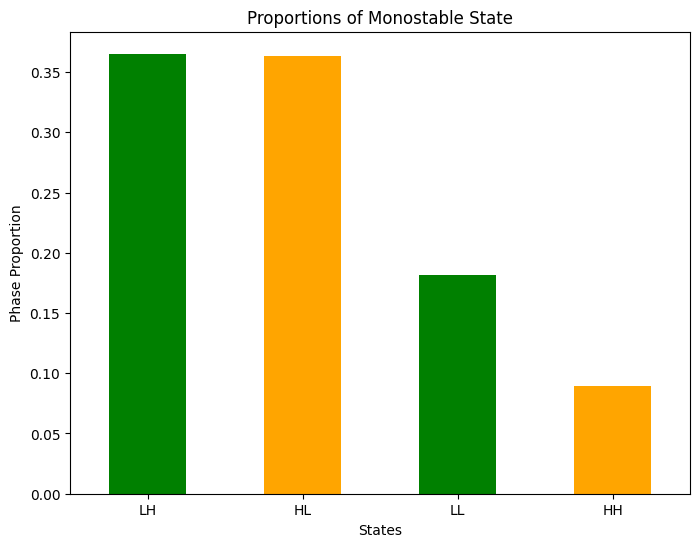

In [ ]:
import matplotlib.pyplot as plt

# Plot the bar graph
plt.figure(figsize=(8, 6))
proportions.plot(kind='bar', color=['green', 'orange'])
plt.title('Proportions of Monostable State')
plt.ylabel('Phase Proportion')
plt.xlabel('States')
plt.xticks(rotation=0)
plt.show()


In [ ]:
import pandas as pd

df_2 = pd.read_csv('sarthak_2020_solution_2.dat', sep='\t', header=None)

df_2.columns = ['model_index', 'stable_states', 'A1', 'B1', 'C1', 'D1', 'A2', 'B2', 'C2', 'D2']

# Z-normalize the expression levels of genes using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_2[['A1', 'B1', 'C1', 'D1', 'A2', 'B2', 'C2', 'D2']] = scaler.fit_transform(df_2[['A1', 'B1', 'C1', 'D1', 'A2', 'B2', 'C2', 'D2']])

print(df_2)


      model_index  stable_states        A1        B1        C1        D1  \
0               3              2  0.642531  0.169569 -0.972953 -0.905544   
1               4              2 -1.146408 -1.101457  1.647721  1.208461   
2               5              2 -0.724185 -1.352452  1.203720  1.028192   
3               9              2  1.407985  1.033317 -0.426575 -1.630587   
4              13              2 -1.542393 -0.438189  0.778148  0.177021   
...           ...            ...       ...       ...       ...       ...   
2722         9961              2  0.016691 -0.906115  1.619302  1.232556   
2723         9962              2  0.970505  1.283391  0.123070 -1.288057   
2724         9977              2 -0.914129 -1.517781  1.179474  1.499103   
2725         9998              2 -0.544173 -0.825166  0.879742  1.480854   
2726        10000              2 -1.056105 -0.336656 -1.047633 -0.651186   

            A2        B2        C2        D2  
0     1.185713  1.020554 -1.184464 -1.12

In [ ]:
import pandas as pd
import numpy as np
import time

# Create a sample DataFrame
np.random.seed(0)
size = 10000000  # Adjust for testing
df_2 = pd.DataFrame({
    'B1': np.random.randn(size) * 10,
    'D1': np.random.randn(size) * 10
})

# Method 1: Using apply() with a defined function
def classify_expression(a, b):
    if a > 0 and b > 0:
        return 'HH'
    elif a > 0 and b < 0:
        return 'HL'
    elif a < 0 and b > 0:
        return 'LH'
    else:
        return 'LL'

# Measure time for apply() method
start_time = time.time()
df_2['State1_apply'] = df_2.apply(lambda row: classify_expression(row['B1'], row['D1']), axis=1)
apply_time = time.time() - start_time
print(f"Time taken using apply(): {apply_time:.4f} seconds")

# Method 2: Using numpy.select() for vectorized operations
# Define conditions
conditions = [
    (df_2['B1'] > 0) & (df_2['D1'] > 0),
    (df_2['B1'] > 0) & (df_2['D1'] < 0),
    (df_2['B1'] < 0) & (df_2['D1'] > 0),
    (df_2['B1'] <= 0) & (df_2['D1'] <= 0)
]

# Define corresponding outputs
outputs = ['HH', 'HL', 'LH', 'LL']

# Measure time for numpy.select() method
start_time = time.time()
df_2['State1_vectorized'] = np.select(conditions, outputs)
vectorized_time = time.time() - start_time
print(f"Time taken using vectorized approach: {vectorized_time:.4f} seconds")

# Compare the two methods
print(f"Vectorized method is {apply_time / vectorized_time:.2f} times faster than apply() method.")


Time taken using apply(): 103.6780 seconds
Time taken using vectorized approach: 2.8904 seconds
Vectorized method is 35.87 times faster than apply() method.


Slower method to use .apply() better use numpy.select() which is way faster. Refer to above comparison.

In [ ]:
# def classify_expression(a, b):
#     if a > 0 and b > 0:
#         return 'HH'
#     elif a > 0 and b < 0:
#         return 'HL'
#     elif a < 0 and b > 0:
#         return 'LH'
#     else:
#         return 'LL'

# # Apply the classify_expression function row-wise
# df_2['State1'] = df_2.apply(lambda row: classify_expression(row['B1'], row['D1']), axis=1)

# # Apply the classify_expression function row-wise
# df_2['State2'] = df_2.apply(lambda row: classify_expression(row['B2'], row['D2']), axis=1)

# # Combine the states into a single 'Cluster' column
# df_2['Cluster'] = (df_2['State1'] + ", " + df_2['State2'])


# # Show the updated DataFrame
# print(df_2)


In [ ]:
import numpy as np
import pandas as pd

# Define conditions based on the logic in classify_expression
conditions_1 = [
    (df_2['B1'] > 0) & (df_2['D1'] > 0),   # Both are positive
    (df_2['B1'] > 0) & (df_2['D1'] < 0),   # B1 positive, D1 negative
    (df_2['B1'] < 0) & (df_2['D1'] > 0),   # B1 negative, D1 positive
    (df_2['B1'] <= 0) & (df_2['D1'] <= 0)  # Both are zero or negative
]

conditions_2 = [
    (df_2['B2'] > 0) & (df_2['D2'] > 0),   # Both are positive
    (df_2['B2'] > 0) & (df_2['D2'] < 0),   # B1 positive, D1 negative
    (df_2['B2'] < 0) & (df_2['D2'] > 0),   # B1 negative, D1 positive
    (df_2['B2'] <= 0) & (df_2['D2'] <= 0)  # Both are zero or negative
]

# Define corresponding outputs
outputs = ['HH', 'HL', 'LH', 'LL']

# Use numpy.select to apply the conditions
df_2['State1'] = np.select(conditions_1, outputs)
df_2['State2'] = np.select(conditions_2, outputs)

# Combine the states into a single 'Cluster' column
df_2['Cluster'] = (df_2['State1'] + ", " + df_2['State2'])

print(df_2)


      model_index  stable_states        A1        B1        C1        D1  \
0               3              2  0.642531  0.169569 -0.972953 -0.905544   
1               4              2 -1.146408 -1.101457  1.647721  1.208461   
2               5              2 -0.724185 -1.352452  1.203720  1.028192   
3               9              2  1.407985  1.033317 -0.426575 -1.630587   
4              13              2 -1.542393 -0.438189  0.778148  0.177021   
...           ...            ...       ...       ...       ...       ...   
2722         9961              2  0.016691 -0.906115  1.619302  1.232556   
2723         9962              2  0.970505  1.283391  0.123070 -1.288057   
2724         9977              2 -0.914129 -1.517781  1.179474  1.499103   
2725         9998              2 -0.544173 -0.825166  0.879742  1.480854   
2726        10000              2 -1.056105 -0.336656 -1.047633 -0.651186   

            A2        B2        C2        D2 State1 State2 Cluster  
0     1.185713  1.

In [ ]:
def standardize_combination(pair_str):
    pairs = sorted(pair_str.split(', '))
    return ', '.join(pairs)

# Apply this function
df_2['Standardized_Cluster'] = df_2['Cluster'].apply(standardize_combination)
print (df_2)

      model_index  stable_states        A1        B1        C1        D1  \
0               3              2  0.642531  0.169569 -0.972953 -0.905544   
1               4              2 -1.146408 -1.101457  1.647721  1.208461   
2               5              2 -0.724185 -1.352452  1.203720  1.028192   
3               9              2  1.407985  1.033317 -0.426575 -1.630587   
4              13              2 -1.542393 -0.438189  0.778148  0.177021   
...           ...            ...       ...       ...       ...       ...   
2722         9961              2  0.016691 -0.906115  1.619302  1.232556   
2723         9962              2  0.970505  1.283391  0.123070 -1.288057   
2724         9977              2 -0.914129 -1.517781  1.179474  1.499103   
2725         9998              2 -0.544173 -0.825166  0.879742  1.480854   
2726        10000              2 -1.056105 -0.336656 -1.047633 -0.651186   

            A2        B2        C2        D2 State1 State2 Cluster  \
0     1.185713  1

In [ ]:
# Calculate the proportion of each standardized combination
proportions = df_2['Standardized_Cluster'].value_counts(normalize=True)
print(proportions)

# Define the desired combinations to filter
desired_combinations = ['HH, HL', 'HH, LH', 'HH, LL', 'HL, LH', 'HL, LL', 'LH, LL']

# Filter the proportions
filtered_proportions = proportions[proportions.index.isin(desired_combinations)]

print(filtered_proportions)


Standardized_Cluster
HL, LH    0.468280
HL, LL    0.163550
LH, LL    0.158049
HH, HL    0.059773
LH, LH    0.058673
HL, HL    0.042904
HH, LH    0.042171
HH, HH    0.004400
LL, LL    0.002200
Name: proportion, dtype: float64
Standardized_Cluster
HL, LH    0.468280
HL, LL    0.163550
LH, LL    0.158049
HH, HL    0.059773
HH, LH    0.042171
Name: proportion, dtype: float64


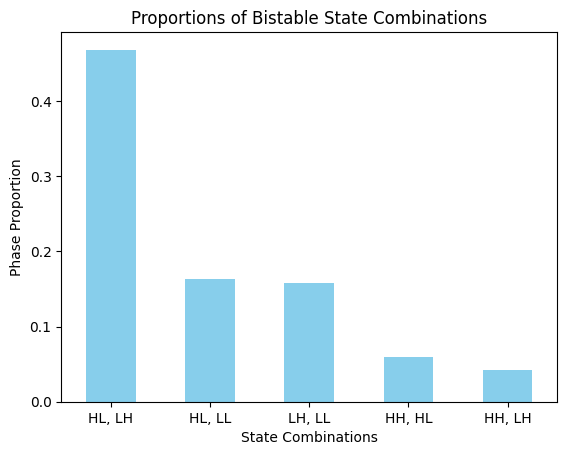

In [ ]:
import matplotlib.pyplot as plt

# Plot the filtered proportions
filtered_proportions.plot(kind='bar', color='skyblue')
plt.xlabel('State Combinations')
plt.ylabel('Phase Proportion')
plt.title('Proportions of Bistable State Combinations')
plt.xticks(rotation=0)
plt.show()


In [ ]:
import pandas as pd

df_3 = pd.read_csv('sarthak_2020_solution_3.dat', sep='\t', header=None)

df_3.columns = ['model_index', 'stable_states', 'A1', 'B1', 'C1', 'D1', 'A2', 'B2', 'C2', 'D2', 'A3', 'B3', 'C3', 'D3']

# Z-normalize the expression levels of genes using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_3[['A1', 'B1', 'C1', 'D1', 'A2', 'B2', 'C2', 'D2', 'A3', 'B3', 'C3', 'D3']] = scaler.fit_transform(df_3[['A1', 'B1', 'C1', 'D1', 'A2', 'B2', 'C2', 'D2', 'A3', 'B3', 'C3', 'D3']])

print(df_3)


      model_index  stable_states        A1        B1        C1        D1  \
0              15              3  1.440727  0.913124  1.127640  0.955870   
1              16              3  1.400080  0.862573  1.018344 -0.392405   
2              18              3 -0.608833 -0.855955 -0.967547 -0.120292   
3              20              3  1.251367  1.299736 -0.807991 -1.022409   
4              22              3 -1.082746 -0.397736 -0.801850 -0.009935   
...           ...            ...       ...       ...       ...       ...   
3766         9993              3 -0.061720 -1.037426  1.283341  1.702645   
3767         9995              3  1.449415  0.990320 -0.777950 -0.407929   
3768         9996              3 -1.031618 -0.242360 -0.474421  0.223429   
3769         9997              3  1.500645  1.356793 -1.030468 -1.175847   
3770         9999              3 -1.046856 -1.024008 -0.995500 -0.369244   

            A2        B2        C2        D2        A3        B3        C3  \
0     1.4

In [ ]:
def classify_expression(a, b):
    if a > 0 and b > 0:
        return 'HH'
    elif a > 0 and b < 0:
        return 'HL'
    elif a < 0 and b > 0:
        return 'LH'
    else:
        return 'LL'

# Apply the classify_expression function row-wise
df_3['State1'] = df_3.apply(lambda row: classify_expression(row['B1'], row['D1']), axis=1)

# Apply the classify_expression function row-wise
df_3['State2'] = df_3.apply(lambda row: classify_expression(row['B2'], row['D2']), axis=1)

df_3['State3'] = df_3.apply(lambda row: classify_expression(row['B3'], row['D3']), axis=1)


# Combine the states
df_3['Cluster'] = (df_3['State1'] + ", " + df_3['State2'] + ", " + df_3['State3'])

print(df_3)

      model_index  stable_states        A1        B1        C1        D1  \
0              15              3  1.440727  0.913124  1.127640  0.955870   
1              16              3  1.400080  0.862573  1.018344 -0.392405   
2              18              3 -0.608833 -0.855955 -0.967547 -0.120292   
3              20              3  1.251367  1.299736 -0.807991 -1.022409   
4              22              3 -1.082746 -0.397736 -0.801850 -0.009935   
...           ...            ...       ...       ...       ...       ...   
3766         9993              3 -0.061720 -1.037426  1.283341  1.702645   
3767         9995              3  1.449415  0.990320 -0.777950 -0.407929   
3768         9996              3 -1.031618 -0.242360 -0.474421  0.223429   
3769         9997              3  1.500645  1.356793 -1.030468 -1.175847   
3770         9999              3 -1.046856 -1.024008 -0.995500 -0.369244   

            A2        B2        C2        D2        A3        B3        C3  \
0     1.4

      model_index  stable_states        A1        B1        C1        D1  \
0              15              3  1.440727  0.913124  1.127640  0.955870   
1              16              3  1.400080  0.862573  1.018344 -0.392405   
2              18              3 -0.608833 -0.855955 -0.967547 -0.120292   
3              20              3  1.251367  1.299736 -0.807991 -1.022409   
4              22              3 -1.082746 -0.397736 -0.801850 -0.009935   
...           ...            ...       ...       ...       ...       ...   
3766         9993              3 -0.061720 -1.037426  1.283341  1.702645   
3767         9995              3  1.449415  0.990320 -0.777950 -0.407929   
3768         9996              3 -1.031618 -0.242360 -0.474421  0.223429   
3769         9997              3  1.500645  1.356793 -1.030468 -1.175847   
3770         9999              3 -1.046856 -1.024008 -0.995500 -0.369244   

            A2        B2        C2        D2        A3        B3        C3  \
0     1.4

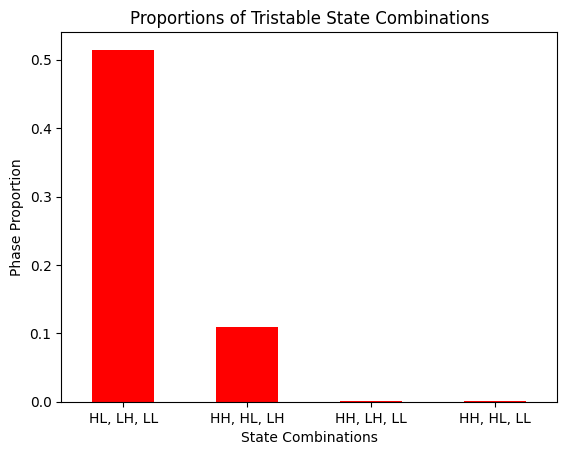

In [ ]:
def standardize_combination(pair_str):
    pairs = sorted(pair_str.split(', '))
    return ', '.join(pairs)

df_3['Standardized_Cluster'] = df_3['Cluster'].apply(standardize_combination)
print (df_3)

# Calculate the proportions
proportions = df_3['Standardized_Cluster'].value_counts(normalize=True)
print(proportions)

desired_combinations = ['HH, HL, LH', 'HH, HL, LL', 'HL, LH, LL', 'HH, LH, LL']

# Filter the proportions
filtered_proportions = proportions[proportions.index.isin(desired_combinations)]

print(filtered_proportions)


In [ ]:
import matplotlib.pyplot as plt

# Plot the filtered proportions as a bar chart
filtered_proportions.plot(kind='bar', color='red')
plt.xlabel('State Combinations')
plt.ylabel('Phase Proportion')
plt.title('Proportions of Tristable State Combinations')
plt.xticks(rotation=0)
plt.show()


# **Omics Analysis - 18/09/2024**

**Figure 6**

In [ ]:
!pip install GEOparse

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import GEOparse
from scipy.stats import linregress

In [ ]:
# Load the platform data using GEOparse
gpl = GEOparse.get_GEO(geo='GPL6244')

In [ ]:
# Convert the platform table to a DataFrame
platform_df = gpl.table

# Searching for PPARG and HNF4A in the gene_assignment column
pparg = platform_df[platform_df['gene_assignment'].str.contains('// PPARG //', na=False)]
hnf4a = platform_df[platform_df['gene_assignment'].str.contains('// HNF4A //', na=False)]

print("PPARG identifiers:")
print(pparg[['ID', 'gene_assignment']])

print("HNF4A identifiers:")
print(hnf4a[['ID', 'gene_assignment']])

PPARG identifiers:
            ID                                    gene_assignment
18071  8077899  NM_005037 // PPARG // peroxisome proliferator-...
HNF4A identifiers:
            ID                                    gene_assignment
16522  8062823  NM_001287184 // HNF4A // hepatocyte nuclear fa...


In [ ]:
# Load a specific dataset by its GEO accession number
gse = GEOparse.get_GEO(geo="GSE66676")

In [ ]:
# Initialize an empty list to store dataframes
all_samples = []

# Loop through each sample in the dataset
for gsm_id, gsm in gse.gsms.items():
    df = gsm.table  # The table attribute of a GSM object contains the expression data
    df['sample_id'] = gsm_id
    all_samples.append(df)

# Concatenate all sample dataframes
expression_data = pd.concat(all_samples, axis=0)

print(expression_data)

        ID_REF     VALUE   sample_id
0      7896736  0.148500  GSM1627740
1      7896738 -0.068521  GSM1627740
2      7896740  0.013849  GSM1627740
3      7896742 -0.334257  GSM1627740
4      7896744 -0.161956  GSM1627740
...        ...       ...         ...
28864  8180111  0.114266  GSM1627806
28865  8180123  0.271006  GSM1627806
28866  8180144  0.413938  GSM1627806
28867  8180166  0.330205  GSM1627806
28868  8180179  0.093315  GSM1627806

[1934223 rows x 3 columns]


In [ ]:
# Filter for PPARG and HNF4A
pparg_data = expression_data[expression_data['ID_REF'] == int(pparg ['ID'].values)]
hnf4a_data = expression_data[expression_data['ID_REF'] == int(hnf4a ['ID'].values)]

# Merge the dataframes on sample_id
merged_data = pd.merge(
    pparg_data[['sample_id', 'VALUE']],
    hnf4a_data[['sample_id', 'VALUE']],
    on='sample_id',
    suffixes=('_PPARG', '_HNF4A')
)

print(merged_data)

     sample_id  VALUE_PPARG  VALUE_HNF4A
0   GSM1627740     0.043339     0.214587
1   GSM1627741    -0.179266     0.066046
2   GSM1627742     0.247534    -0.159598
3   GSM1627743     0.009758     0.190846
4   GSM1627744     0.402459     0.203774
..         ...          ...          ...
62  GSM1627802    -0.029915    -0.252800
63  GSM1627803     0.034336    -0.077168
64  GSM1627804     0.092105    -0.615061
65  GSM1627805     0.383623    -0.369627
66  GSM1627806     0.030133     0.291469

[67 rows x 3 columns]


<ipython-input-25-2cdff5aab3d7>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pparg_data = expression_data[expression_data['ID_REF'] == int(pparg ['ID'].values)]
<ipython-input-25-2cdff5aab3d7>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hnf4a_data = expression_data[expression_data['ID_REF'] == int(hnf4a ['ID'].values)]


Pearson Correlation Coefficient: -0.22071503082481
P-value: 0.07267962990613336


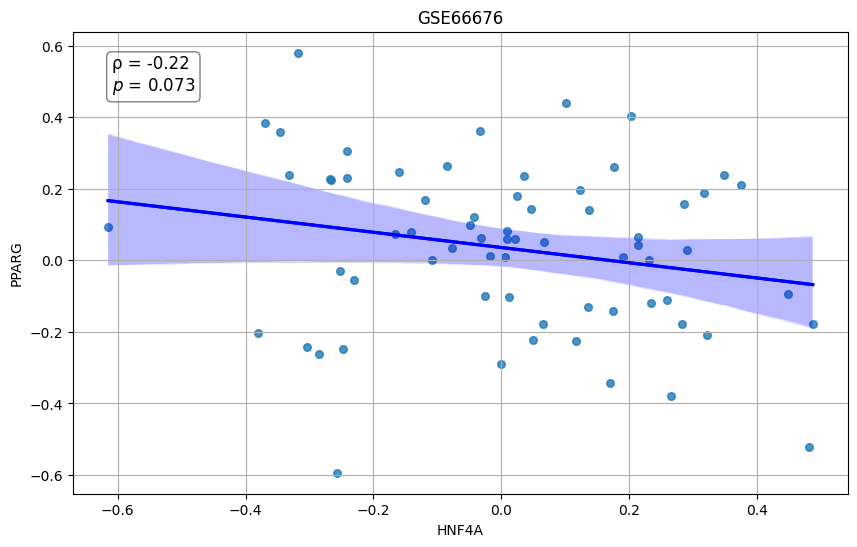

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Calculate correlation coefficient and p-value
slope, intercept, r_value, p_value, std_err = linregress(merged_data['VALUE_HNF4A'], merged_data['VALUE_PPARG'])

print(f'Pearson Correlation Coefficient: {r_value}')
print(f'P-value: {p_value}')

# Scatter plot
plt.figure(figsize=(10, 6))
# Scatter plot with regression line and confidence interval
sns.regplot(x='VALUE_HNF4A', y='VALUE_PPARG', data=merged_data,
            ci=95, scatter_kws={'s': 30},
            line_kws={'color': 'blue'},
            scatter=True)

# Add the confidence interval with alpha
sns.regplot(x='VALUE_HNF4A', y='VALUE_PPARG', data=merged_data,
            ci=95, scatter=False,
            line_kws={'color': 'blue', 'alpha': 1},
            scatter_kws={'s': 10})

plt.title(f'{gse.name}')
plt.text(0.05, 0.95, f'ρ = {r_value:.2f}\n$p$ = {p_value:.3f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.xlabel('HNF4A')
plt.ylabel('PPARG')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import GEOparse
from scipy.stats import linregress

# List of GSE datasets
gse_list = ['GSE66676', 'GSE48452', 'GSE63067']

# Initialize the figure and axes
fig, axes = plt.subplots(1, len(gse_list), figsize=(15, 5))

for i, gse_id in enumerate(gse_list):
    # Download GSE data using the FTP link
    gse = GEOparse.get_GEO(geo=gse_id, destdir="./")
    df = gse.pivot_samples('VALUE')

    # Extract PPARG and HNF4A gene expression data
    pparg_expression = df.loc['PPARG']
    hnf4a_expression = df.loc['HNF4A']

    # Scatter plot with regression line and confidence interval
    sns.regplot(x=hnf4a_expression, y=pparg_expression, ci=95,
                ax=axes[i], scatter_kws={'s': 30},
                line_kws={'color': 'blue'})

    # Calculate correlation coefficient and p-value
    slope, intercept, r_value, p_value, std_err = linregress(pparg_expression, hnf4a_expression)

    # Display r-value and p-value on the plot
    axes[i].text(0.05, 0.95, f'ρ = {r_value:.2f}\n$p$ = {p_value:.3f}',
                 transform=axes[i].transAxes, fontsize=12,
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    axes[i].set_title(gse_id)
    axes[i].set_ylabel('PPARG')
    axes[i].set_xlabel('HNF4A')

plt.tight_layout()
plt.show()


### Trying to automate plotting for different series

GSE66676
GPL6244
PPARG identifiers:
            ID                                    gene_assignment
18071  8077899  NM_005037 // PPARG // peroxisome proliferator-...
HNF4A identifiers:
            ID                                    gene_assignment
16522  8062823  NM_001287184 // HNF4A // hepatocyte nuclear fa...
     sample_id  VALUE_PPARG  VALUE_HNF4A
0   GSM1627740     0.043339     0.214587
1   GSM1627741    -0.179266     0.066046
2   GSM1627742     0.247534    -0.159598
3   GSM1627743     0.009758     0.190846
4   GSM1627744     0.402459     0.203774
..         ...          ...          ...
62  GSM1627802    -0.029915    -0.252800
63  GSM1627803     0.034336    -0.077168
64  GSM1627804     0.092105    -0.615061
65  GSM1627805     0.383623    -0.369627
66  GSM1627806     0.030133     0.291469

[67 rows x 3 columns]
Pearson Correlation Coefficient: -0.22071503082481
P-value: 0.07267962990613336


<ipython-input-143-18f078b905bf>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pparg_data = expression_data[expression_data['ID_REF'] == int(pparg['ID'].values)]
<ipython-input-143-18f078b905bf>:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hnf4a_data = expression_data[expression_data['ID_REF'] == int(hnf4a['ID'].values)]


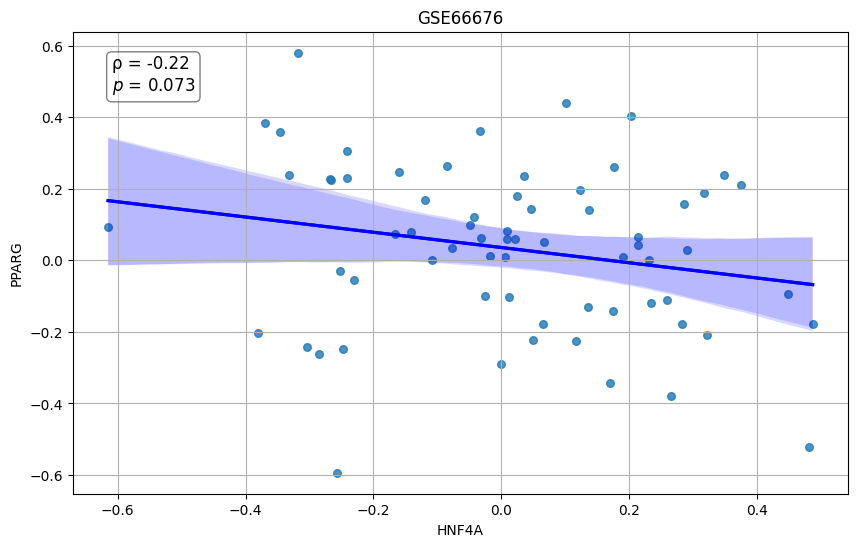

GSE48452
GPL11532
PPARG identifiers:
            ID                                    gene_assignment
16953  8077899  NM_138712 // PPARG // peroxisome proliferator-...
HNF4A identifiers:
            ID                                    gene_assignment
15494  8062823  NM_000457 // HNF4A // hepatocyte nuclear facto...
     sample_id  VALUE_PPARG  VALUE_HNF4A
0   GSM1178970     7.450822     9.513674
1   GSM1178971     6.670755    10.074744
2   GSM1178972     6.725527    10.123789
3   GSM1178973     6.981977    10.244878
4   GSM1178974     6.929241    10.064683
..         ...          ...          ...
68  GSM1179038     6.885100    10.066112
69  GSM1179039     6.508182    10.049710
70  GSM1179040     6.654694     9.866892
71  GSM1179041     6.663439    10.450900
72  GSM1179042     6.987273    10.037012

[73 rows x 3 columns]
Pearson Correlation Coefficient: -0.28527532937420275
P-value: 0.014429367814326213


<ipython-input-143-18f078b905bf>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pparg_data = expression_data[expression_data['ID_REF'] == int(pparg['ID'].values)]
<ipython-input-143-18f078b905bf>:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hnf4a_data = expression_data[expression_data['ID_REF'] == int(hnf4a['ID'].values)]


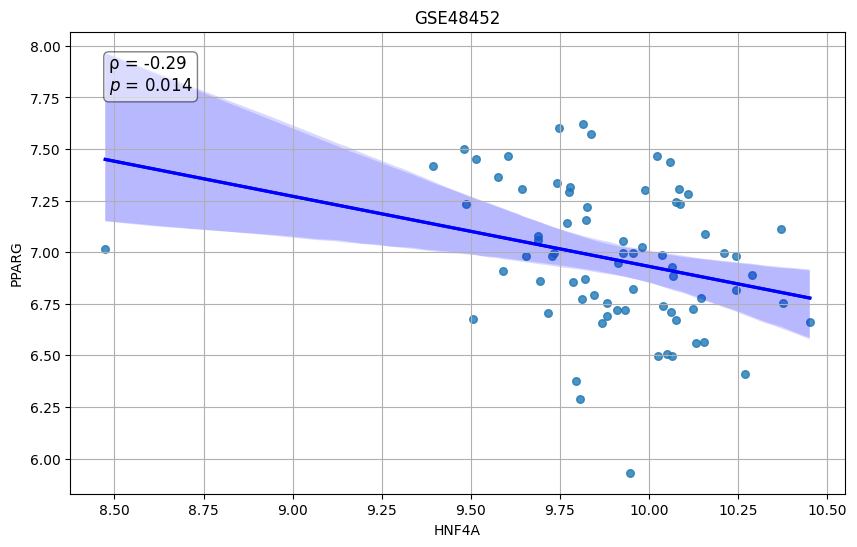

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

gse_list = ['GSE66676', 'GSE48452']

for gse in gse_list:
    # Download GSE data using the FTP link
    gse = GEOparse.get_GEO(geo=gse, destdir="./", silent=True)
    print(gse.name)

    platform_id = gse.get_metadata_attribute('platform_id')

    print(platform_id)

    # Load the platform data using GEOparse
    gpl = GEOparse.get_GEO(geo=f'{platform_id}', silent=True)

    # Convert the platform table to a DataFrame
    platform_df = gpl.table

    # Searching for PPARG and HNF4A in the gene_assignment column
    pparg = platform_df[platform_df['gene_assignment'].str.contains('// PPARG //', na=False)]
    hnf4a = platform_df[platform_df['gene_assignment'].str.contains('// HNF4A //', na=False)]

    # Print the found rows
    print("PPARG identifiers:")
    print(pparg[['ID', 'gene_assignment']])

    print("HNF4A identifiers:")
    print(hnf4a[['ID', 'gene_assignment']])

    # Initialize an empty list to store dataframes
    all_samples = []

        # Loop through each sample in the dataset
    for gsm_id, gsm in gse.gsms.items():
        df = gsm.table[gsm.table['ID_REF'].isin(np.concatenate([pparg['ID'].values, hnf4a['ID'].values]))].copy()
        df['sample_id'] = gsm_id
        all_samples.append(df)

    # Concatenate all sample dataframes
    expression_data = pd.concat(all_samples, axis=0)

    # Filter for PPARG and HNF4A
    pparg_data = expression_data[expression_data['ID_REF'] == int(pparg['ID'].values)]
    hnf4a_data = expression_data[expression_data['ID_REF'] == int(hnf4a['ID'].values)]

    # Merge the dataframes on sample_id
    merged_data = pd.merge(
        pparg_data[['sample_id', 'VALUE']],
        hnf4a_data[['sample_id', 'VALUE']],
        on='sample_id',
        suffixes=('_PPARG', '_HNF4A')
    )

    print(merged_data)

    # Calculate correlation coefficient and p-value
    slope, intercept, r_value, p_value, std_err = linregress(merged_data['VALUE_HNF4A'], merged_data['VALUE_PPARG'])

    print(f'Pearson Correlation Coefficient: {r_value}')
    print(f'P-value: {p_value}')

    # Scatter plot
    plt.figure(figsize=(10, 6))
    # Scatter plot with regression line and confidence interval
    sns.regplot(x='VALUE_HNF4A', y='VALUE_PPARG', data=merged_data,
                ci=95, scatter_kws={'s': 30},
                line_kws={'color': 'blue'},
                scatter=True)

    # Add the confidence interval with alpha
    sns.regplot(x='VALUE_HNF4A', y='VALUE_PPARG', data=merged_data,
                ci=95, scatter=False,
                line_kws={'color': 'blue', 'alpha': 1},
                scatter_kws={'s': 10})

    plt.title(f'{gse.name}')
    plt.text(0.05, 0.95, f'ρ = {r_value:.2f}\n$p$ = {p_value:.3f}',
            transform=plt.gca().transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    plt.xlabel('HNF4A')
    plt.ylabel('PPARG')
    plt.grid(True)
    plt.show()

In [ ]:
gpl_3 = GEOparse.get_GEO(geo="GPL570", silent=True)

# Convert the platform table to a DataFrame
platform_df_3 = gpl_3.table

# Searching for PPARG and HNF4A in the gene_assignment column
pparg_3 = platform_df_3[platform_df_3['Gene Symbol'] == 'PPARG']
hnf4a_3 = platform_df_3[platform_df_3['Gene Symbol'] == 'HNF4A']

print("PPARG identifiers:")
print(pparg_3[['ID', 'Gene Symbol']])

print("HNF4A identifiers:")
print(hnf4a_3[['ID', 'Gene Symbol']])

PPARG identifiers:
                ID Gene Symbol
17928  208510_s_at       PPARG
HNF4A identifiers:
                ID Gene Symbol
17848  208429_x_at       HNF4A
24127    214832_at       HNF4A
24146    214851_at       HNF4A
26179  216889_s_at       HNF4A
40026    230772_at       HNF4A
40168    230914_at       HNF4A


/usr/local/lib/python3.10/dist-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")


In [ ]:
gse_3 = GEOparse.get_GEO(geo="GSE63067", silent=True)

# Initialize an empty list
all_samples = []

# Loop through each sample in the dataset
for gsm_id, gsm in gse_3.gsms.items():
      df = gsm.table
      df['sample_id'] = gsm_id
      all_samples.append(df)

  # Concatenate all sample dataframes
expression_data_3 = pd.concat(all_samples, axis=0)

# Filter for PPARG and HNF4A
pparg_data_3 = expression_data_3[expression_data_3['ID_REF'].isin(pparg_3['ID'].values)]
hnf4a_data_3 = expression_data_3[expression_data_3['ID_REF'].isin(hnf4a_3['ID'].values)]

# Merge the dataframes on sample_id
merged_data_3 = pd.merge(
  pparg_data_3[['sample_id', 'VALUE']],
  hnf4a_data_3[['sample_id', 'VALUE']],
  on='sample_id',
  suffixes=('_PPARG', '_HNF4A')
)

merged_data_3 = merged_data_3.groupby('sample_id').agg({'VALUE_PPARG': 'mean', 'VALUE_HNF4A': 'mean'})

print(merged_data_3)

Pearson Correlation Coefficient: -0.4121210977216522
P-value: 0.08923449627818614


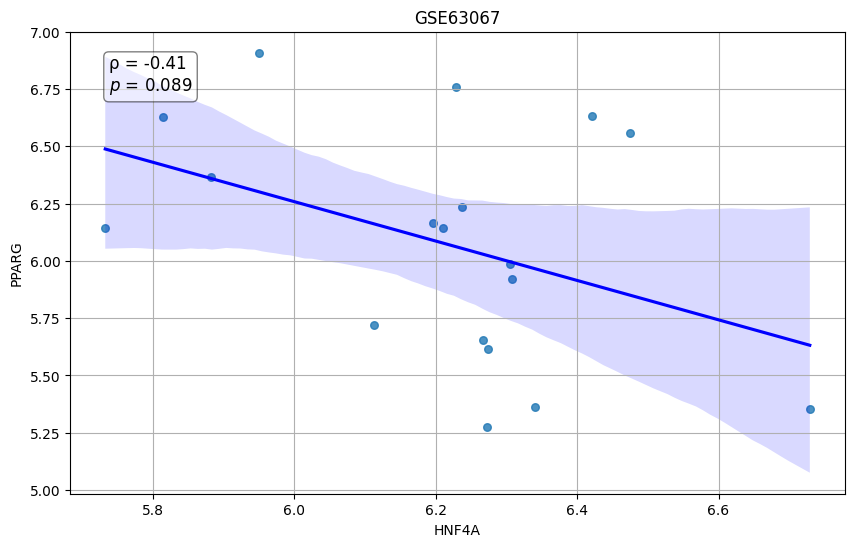

In [ ]:
# Calculate correlation coefficient and p-value
slope, intercept, r_value, p_value, std_err = linregress(merged_data_3['VALUE_HNF4A'], merged_data_3['VALUE_PPARG'])

print(f'Pearson Correlation Coefficient: {r_value}')
print(f'P-value: {p_value}')

# Scatter plot
plt.figure(figsize=(10, 6))
# Scatter plot with regression line and confidence interval
sns.regplot(x='VALUE_HNF4A', y='VALUE_PPARG', data=merged_data_3,
            ci=95, scatter_kws={'s': 30},
            line_kws={'color': 'blue'},
            scatter=True)

plt.title(f'{gse_3.name}')
plt.text(0.05, 0.95, f'ρ = {r_value:.2f}\n$p$ = {p_value:.3f}',
        transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.xlabel('HNF4A')
plt.ylabel('PPARG')
plt.grid(True)
plt.show()

**Box Plots**

In [ ]:
import GEOparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download GSE33814 dataset
gse = GEOparse.get_GEO(geo="GSE33814", silent=True)

In [ ]:
print(gse.gpls)

gpl = GEOparse.get_GEO(geo="GPL6884", silent=True)

{'GPL6884': <d: GPL6884>}


In [ ]:
platform_df = gpl.table

hnf4a = platform_df[platform_df['Symbol'] == 'HNF4A']

print("HNF4A identifiers:")
print(hnf4a[['ID', 'Symbol']])

HNF4A identifiers:
                 ID Symbol
1371   ILMN_1698546  HNF4A
27687  ILMN_1739886  HNF4A
27688  ILMN_2372124  HNF4A


In [ ]:
from scipy.stats import ttest_ind

# Load expression data
expression_data = gse.pivot_samples('VALUE')

# Get sample metadata
metadata = gse.phenotype_data[['geo_accession', 'characteristics_ch1.1.diagnosis']]
metadata.columns = ['Sample', 'Condition']

# Filter for normal and steatohepatitis samples
metadata['Condition'] = metadata['Condition'].str.extract(r"(normal|steatohepatitis)", expand=False)

# Drop NaN
metadata = metadata.dropna()

# HNF4A probe IDs
hnf4a_probes = ['ILMN_1698546', 'ILMN_1739886', 'ILMN_2372124']

# Extract expression data for all HNF4A probes
hnf4a_expression = expression_data.loc[hnf4a_probes]

# Transpose the dataframe and add 'sample_id' column
hnf4a_expression = hnf4a_expression.transpose()
hnf4a_expression['sample_id'] = hnf4a_expression.index

# Group by sample_id and calculate the mean expression for HNF4A probes
hnf4a_mean = hnf4a_expression.groupby('sample_id').mean().mean(axis=1)

# Merge mean expression data with metadata
merged_data = pd.DataFrame(hnf4a_mean, columns=['hnf4a_mean']).merge(metadata, left_index=True, right_on='Sample')

# Perform Student's t-test
group1 = merged_data[merged_data['Condition'] == 'steatohepatitis']['hnf4a_mean']
group2 = merged_data[merged_data['Condition'] == 'normal']['hnf4a_mean']
statistic, p_value = ttest_ind(group1, group2)

print(f'T-statistic: {statistic}')
print(f'P-value: {p_value}')

# Plot box plot of mean HNF4A expression levels
plt.figure(figsize=(6, 9))
sns.boxplot(x='Condition', y='hnf4a_mean', data=merged_data, palette='Set2', order = ['normal', 'steatohepatitis'])

# Add p-value to the plot
plt.text(0.5, 0.95, 'p-value < 0.01', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.title('GSE33814')
plt.xlabel('Condition')
plt.ylabel('Mean HNF4A Expression')

# Show plot
plt.show()

In [ ]:
# Download GSE33814 dataset
gse = GEOparse.get_GEO(geo="GSE37031", silent=True)

In [ ]:
print(gse.gpls)

gpl = GEOparse.get_GEO(geo="GPL14877", silent=True)

{'GPL14877': <d: GPL14877>}


In [ ]:
platform_df = gpl.table

hnf4a = platform_df[platform_df['SPOT_ID'] == 3172]

print("HNF4A identifiers:")
print(hnf4a[:])

HNF4A identifiers:
           ID  SPOT_ID                         Description
7364  3172_at     3172  hepatocyte nuclear factor 4, alpha


In [ ]:
from scipy.stats import ttest_ind

# Load expression data
expression_data = gse.pivot_samples('VALUE')

# Get sample metadata
metadata = gse.phenotype_data[['geo_accession', 'characteristics_ch1.1.disease state']]
metadata.columns = ['Sample', 'Condition']

# Filter for normal and NASH samples
metadata['Condition'] = metadata['Condition'].str.extract(r"(control|non-alcoholic steatohepatitis \(NASH\))", expand=False)

# Drop NaN
metadata = metadata.dropna()

# Extract expression data for the HNF4A probe
hnf4a_expression = expression_data.loc[['3172_at']].T

# Merge mean expression data with metadata
merged_data = pd.DataFrame(hnf4a_expression, columns=['3172_at']).merge(metadata, left_index=True, right_on='Sample')

# Perform Student's t-test
group1 = merged_data[merged_data['Condition'] == 'non-alcoholic steatohepatitis (NASH)']['3172_at']
group2 = merged_data[merged_data['Condition'] == 'control']['3172_at']
statistic, p_value = ttest_ind(group1, group2)

print(f'T-statistic: {statistic}')
print(f'P-value: {p_value}')

# Plot box plot of mean HNF4A expression levels
plt.figure(figsize=(6, 9))
sns.boxplot(x='Condition', y='3172_at', data=merged_data, palette='Set2', order = ['control', 'non-alcoholic steatohepatitis (NASH)'])

# Add p-value to the plot
plt.text(0.5, 0.95, 'p-value < 0.05', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Add title and labels
plt.title(f'{gse.name}')
plt.xlabel('Condition')
plt.ylabel('HNF4A Expression')

# Show plot
plt.show()

For figure 6-D (GSE119340)

In [ ]:
gse = GEOparse.get_GEO(geo="GSE119340", silent=True)

print(gse.gpls)

{'GPL17021': <d: GPL17021>, 'GPL23479': <d: GPL23479>}


In [ ]:
gpl = GEOparse.get_GEO(geo="GPL23479", silent=True)

# Using R for analysis - 22/09/2024

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("GEOquery")
install.packages("ggplot2")

library(GEOquery)
library(ggplot2)

In [ ]:
# Download GSE data
gse <- getGEO("GSE119340", GSEMatrix = TRUE)
gse <- gse[[1]]

# Download GPL platform annotation (GPL23479)
gpl <- getGEO("GPL17021")
gpl_table <- Table(gpl)

In [ ]:
# Identify probes for HNF4A, PPARG, and HNF1A in GPL platform
genes_of_interest <- c("HNF4A", "PPARG", "HNF1A")
probes <- gpl_table[gpl_table$`Gene Symbol` %in% genes_of_interest, c("ID", "Gene Symbol")]

# Filter expression data
expr_data <- exprs(gse)[rownames(exprs(gse)) %in% probes$ID, ]

expr_df <- data.frame(t(expr_data))
expr_df$Sample <- rownames(expr_df)
expr_df$Condition <- pData(gse)$`disease state:ch1